In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

In [2]:
MAP_SHAPE = 100
MAX_ITER = 100

In [4]:
def create_map(size=MAP_SHAPE):
    square = size * size
    x_agents_num = int(0.5 * square)
    o_agents_num = int(0.5 * square)

    map_init = np.zeros(square)
    x_indeces = np.random.choice(square, size=x_agents_num, replace=False)
    o_indeces = np.random.choice(list(set(range(square)) - set(x_indeces)), size=o_agents_num, replace=False)

    map_init[x_indeces] = 1
    map_init[o_indeces] = -1

    return map_init.reshape(size, size)

In [5]:
R = np.linspace(0, 1, 9, endpoint=True)

In [6]:
class Simulator:
    def __init__(self, map_init, r):
        self.map = map_init
        self.r = r
        
        self.shape = self.map.shape[0]
    
    def reset(self):
        self.map = create_map(self.shape)
    
    def set_r(self, new_r):
        self.r = new_r

    def check_satisfaction_of_agent(self, ind_x, ind_y):
        same_neighbours = 0
        color = self.map[ind_x, ind_y]

        for shift_x in [-1, 0, 1]:
            for shift_y in [-1, 0, 1]:
                if shift_x == shift_y == 0:
                    continue
                
                neigbour_x = ind_x + shift_x
                neigbour_y = ind_y + shift_y
                if (0 <= neigbour_x < self.shape) and (0 <= neigbour_y < self.shape):
                    same_neighbours += color == self.map[neigbour_x, neigbour_y]
        
        return same_neighbours < int(8 * self.r)

    def find_unsatisfied(self):
        unsatisfied_ind = []
        for i, row in enumerate(self.map):
            for j, element in enumerate(row):
                if element == 0:
                    continue

                not_satisfied = self.check_satisfaction_of_agent(i, j)
                if not_satisfied:
                    unsatisfied_ind.append((i, j))
        
        return unsatisfied_ind

    def simulate(self, max_iter=100):
        snapshot_history = []
        unsatisfied_history = []

        for i in tqdm(range(max_iter)):
            snapshot_history.append(self.map.copy())
            unsatisfied_ind = np.array(self.find_unsatisfied())
            unsatisfied_history.append(len(unsatisfied_ind))

            ind_empty = np.stack(np.where(self.map == 0), axis=1)
            ind_empty = np.concatenate((ind_empty, unsatisfied_ind.reshape(-1, 2)))
            ind2fill = np.random.choice(len(ind_empty), size=len(unsatisfied_ind), replace=False)
            ind2move = ind_empty[ind2fill]
            unsatisfied_colors = []

            for i, j in unsatisfied_ind:
                unsatisfied_colors.append(self.map[i, j])
                self.map[i, j] = 0
            
            for unsatisfied_cell, (i, j) in enumerate(ind2move):
                self.map[i, j] = unsatisfied_colors[unsatisfied_cell]

        return snapshot_history, unsatisfied_history

In [7]:
simulator = Simulator(create_map(), 0)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:06<00:00, 15.36it/s]
MovieWriter imagemagick unavailable; using Pillow instead.
100%|██████████| 100/100 [00:07<00:00, 14.28it/s]
MovieWriter imagemagick unavailable; using Pillow instead.
100%|██████████| 100/100 [00:06<00:00, 15.12it/s]
MovieWriter imagemagick unavailable; using Pillow instead.
100%|██████████| 100/100 [00:06<00:00, 14.67it/s]
MovieWriter imagemagick unavailable; using Pillow instead.
100%|██████████| 100/100 [00:06<00:00, 14.54it/s]
MovieWriter imagemagick unavailable; using Pillow instead.
100%|██████████| 100/100 [00:07<00:00, 13.57it/s]
MovieWriter imagemagick unavailable; using Pillow instead.
100%|██████████| 100/100 [00:06<00:00, 14.34it/s]
MovieWriter imagemagick unavailable; using Pillow instead.
100%|██████████| 100/100 [00:09<00:00, 10.42it/s]
MovieWriter imagemagick unavailable; using Pillow instead.
100%|██████████| 100/100 [00:10<00:00,  9.77it/s]
MovieWriter imagemagick unavailable; using Pillow instead.


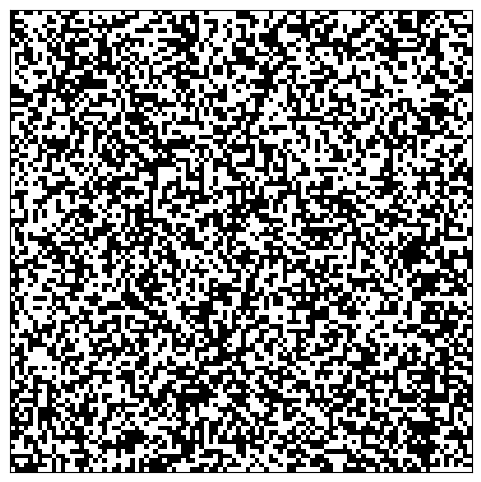

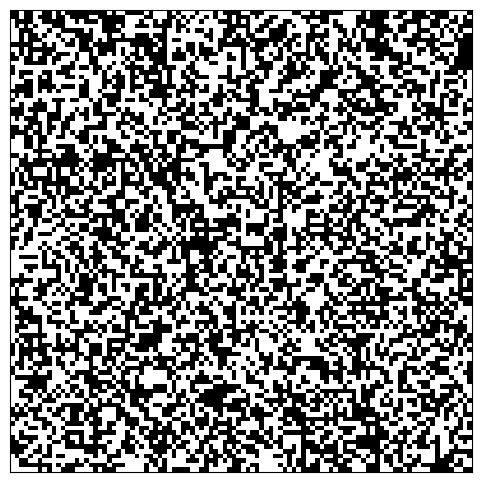

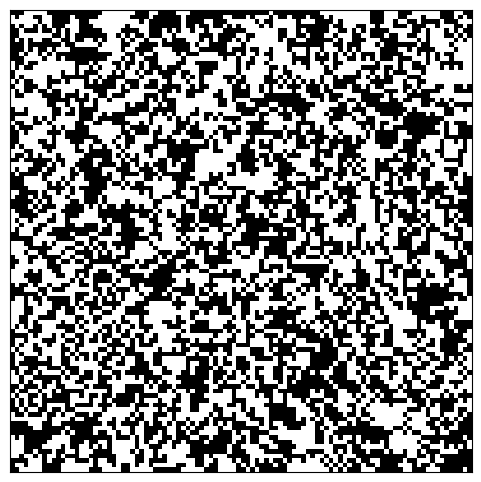

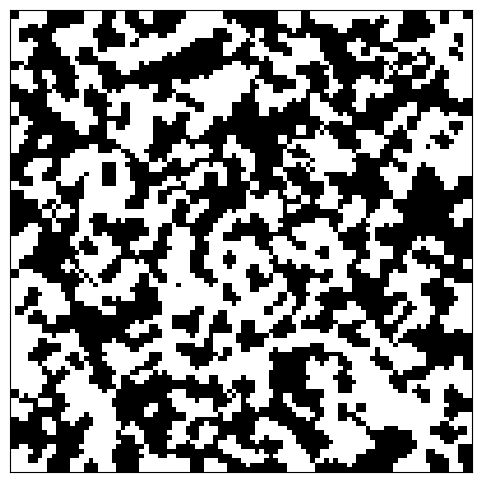

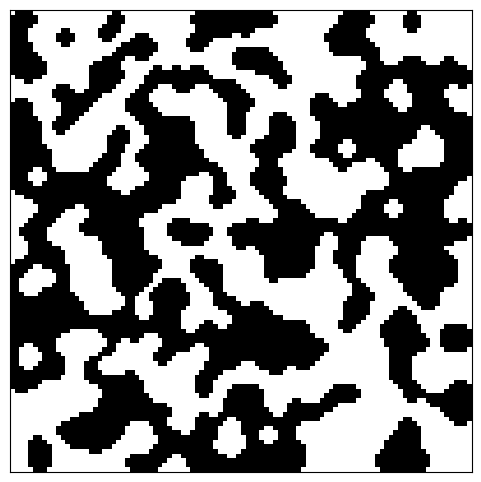

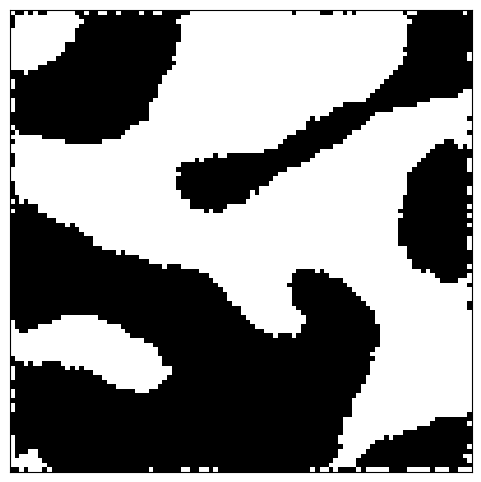

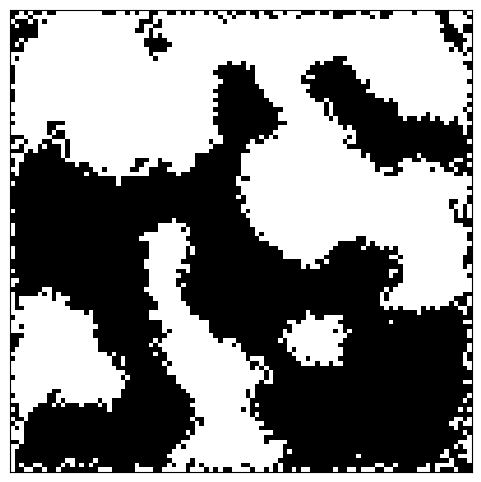

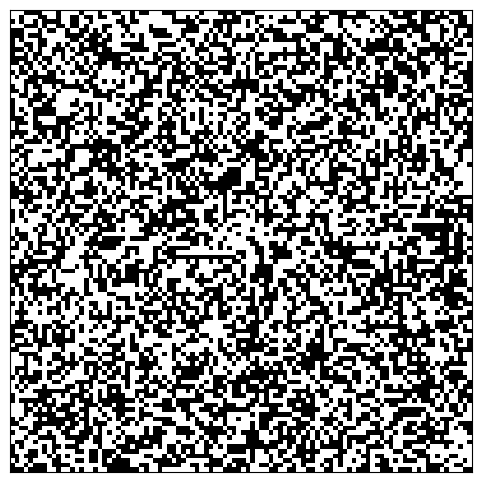

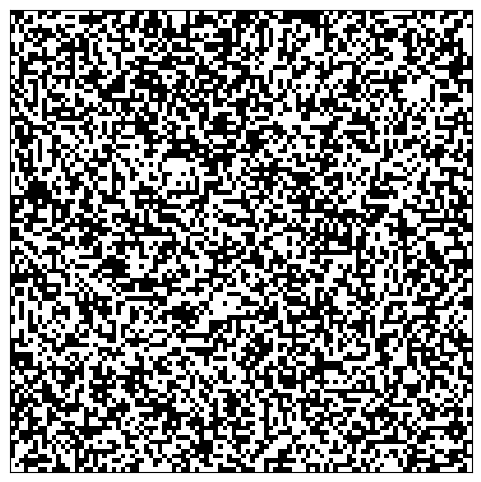

In [8]:
unsatisfied_histories = []

for r in R:
    simulator.set_r(r)
    simulator.reset()

    s, t = simulator.simulate()

    unsatisfied_histories.append(t)
    
    fig = plt.figure(figsize=(6, 6))
    ax = plt.axes()

    def animate(frame):
        ax.clear()
        ax.set_xticks([], [])
        ax.set_yticks([], [])

        img = ax.imshow(s[frame], cmap=cm.binary)
        return [img]

    anim = animation.FuncAnimation(fig, animate, frames=100, interval=100, blit=True, repeat=True)
    anim.save(f'Schelling\'s model, r={r}.gif', writer='imagemagick')

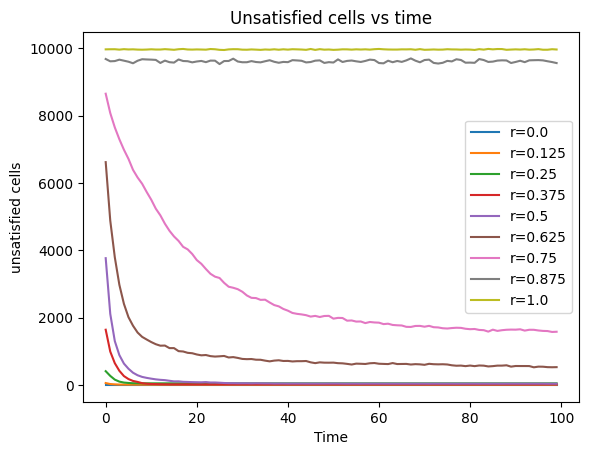

In [9]:
for i, history in enumerate(unsatisfied_histories):
    plt.plot(history, label=f'r={R[i]}')

plt.legend()
plt.title('Unsatisfied cells vs time')
plt.xlabel('Time')
plt.ylabel('unsatisfied cells')
plt.show()